# Autocorrelation Metric

In [195]:
def next_pow_two(n):
    i = 1
    while i < n:
        i = i << 1
    return i


def autocorr_func_1d(x, norm=True):
    x = np.atleast_1d(x)
    if len(x.shape) != 1:
        raise ValueError("invalid dimensions for 1D autocorrelation function")
    n = next_pow_two(len(x))

    # Compute the FFT and then (from that) the auto-correlation function
    f = np.fft.fft(x - np.mean(x), n=2 * n)
    acf = np.fft.ifft(f * np.conjugate(f))[: len(x)].real
    acf /= 4 * n

    # Optionally normalize
    if norm:
        acf /= acf[0]

    return acf

In [196]:
def auto_window(taus, c):
    m = np.arange(len(taus)) < c * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1


# Following the suggestion from Goodman & Weare (2010)
def autocorr_gw2010(y, c=5.0):
    f = autocorr_func_1d(np.mean(y, axis=0))
    taus = 2.0 * np.cumsum(f) - 1.0
    window = auto_window(taus, c)
    return taus[window]

def autocorr_new(y, c=5.0):
    f = np.zeros(y.shape[1])
    for yy in y:
        f += autocorr_func_1d(yy)
    f /= len(y)
    taus = 2.0 * np.cumsum(f) - 1.0
    window = auto_window(taus, c)
    return taus[window]

## GQPMC Data

In [211]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
from matplotlib import cm
from matplotlib import colors as c
from gqp_mc import data as Data 
from gqp_mc import fitters as Fitters
import seaborn as sns

specs,meta = Data.Spectra(sim='lgal',noise = 'none', lib = 'bc03', sample = 'mini_mocha')
photo, _ = Data.Photometry(sim='lgal', noise= 'none', lib='bc03', sample='mini_mocha') 
input_mass = meta['logM_total'][:]

class convergence_plotter_single():
    def __init__(self,walkers,num_run,data_dir):
        self.num_walkers = walkers
        self.num_run = num_run
        self.data_dir = data_dir
        self.files = []
        
    def opener(self):
        f = [x for x in glob.glob(f'{self.data_dir}')]  
        f.sort()
        print(f)
        files = []
        
        for i in f:
            file = h5py.File(i,'r')
            files.append(file)
        
        self.files = files
        return None
    
    def avg_perc_plot(self,ax, gal_idx, spec_photo,step=1000, flag = ''):
        data = self.files[0]['mcmc_chain'][...][:,0]
        perc_err = []
        
        y,up_perc,lo_perc = [], [], []
        length = len(data)
        inc = length//step
        x_axis = (np.arange(inc)+1)*step
        for n in range(inc):
            up = np.percentile(data[:step*(1+n)],84.1)
            lo = np.percentile(data[:step*(1+n)],15.9)
            med = np.median(data[:step*(1+n)])
            up_perc.append(up-med)
            lo_perc.append(med-lo)
            y.append(med)

        yerr = np.vstack((up_perc,lo_perc))    
        ax.set_xlabel('$N_{iteration}$')
        ax.set_ylabel('Median')
        ax.grid()
        ax.axhline(input_mass[gal_idx], lw = 1, c = 'r')
        ax.text(length,y[-1],f'{y[-1]}')
        ax.errorbar(x_axis,y,yerr=yerr,fmt = '.k', ecolor = 'gray', elinewidth=1,capsize=1)


test_gal = convergence_plotter_single(40,50000,'/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.0.mcmc.hdf5')
test_gal.opener()

['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.0.mcmc.hdf5']


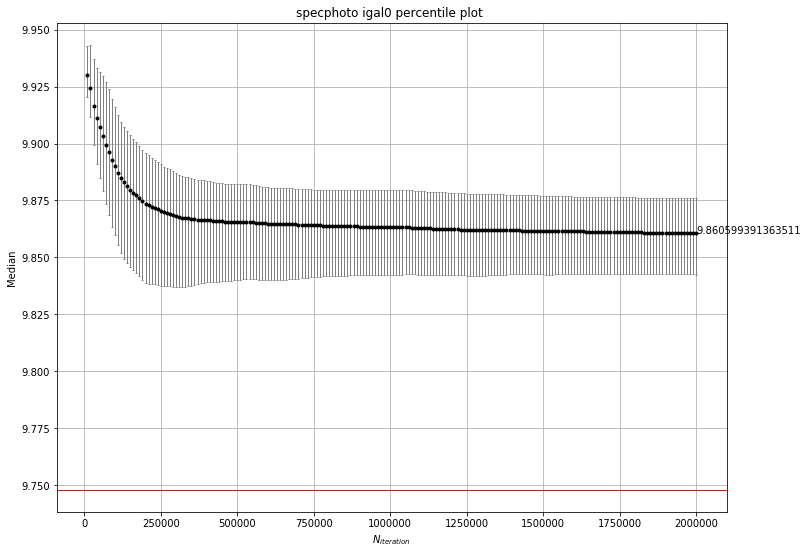

In [58]:
test_gal.avg_perc_plot(0,'specphoto',step = 10000)

In [145]:
igals = np.arange(97)
gqpmc_chains = []
class_chains = []
for igal in igals:
    print(igal,end = '\r')
    try:
        temp_gal = convergence_plotter_single(40,50000,f'/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.{igal}.mcmc.hdf5')
        temp_gal.opener()
        gqpmc_chains.append(h5py.File(gqpmc_path+f'mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.{igal}.mcmc.hdf5', 'r'))
        class_chains.append(temp_gal)
    except:
        class_chains.append('no')
        gqpmc_chains.append('no')

['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.0.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.1.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.2.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.3.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.4.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.5.mcmc.hdf5'

In [146]:
chain_data = []

for i,c in enumerate(gqpmc_chains):
    print(i, end = '\r')
    if c is not 'no':
        temp = c['mcmc_chain'][...][:,0]
        reshaped_temp = []
        for i in range(num_walkers):
            reshaped_temp.append(temp[i::num_walkers])
        reshaped_temp= np.array(reshaped_temp)
        chain_data.append(reshaped_temp)
    else:
        chain_data.append(c)

In [157]:
chain_data2 = np.array(chain_data[0])

(40, 50000)


In [179]:
print(N)

[ 1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000 12000
 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000
 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000
 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000
 49000]


No handles with labels found to put in legend.


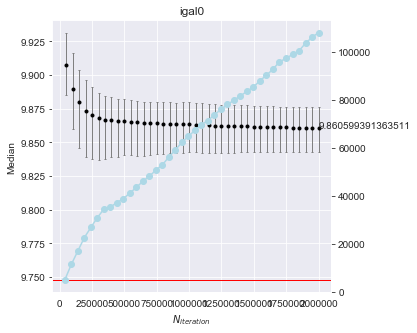

In [194]:
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
sns.set_style('dark')
for i in range(igal):
    if class_chains[i] is not 'no':
        fig, ax = plt.subplots(1,1, figsize = (5,5))
        ax.set_title(f'igal{i}')
        ax2 = ax.twinx()
        gal_data = np.array(chain_data[i])
        length = gal_data.shape[1]
        class_chains[i].avg_perc_plot(ax,i,'specphoto',step = length)
        N = np.arange(1000,length,1000)
        N = np.linspace(1000,length,40,dtype=int)
        new = np.empty(len(N))
        for j,n in enumerate(N):
            new[j] = autocorr_new(gal_data[:,:n])
        ax2.plot(N*40,new*40, 'o-', color = 'lightblue')
#         ax2.plot(N*40,N*40)
#         ax2.plot(N*40,N/17.5, ls = '--', c = 'k', label = 'N/17.5', color = 'steelblue')
#         ax2.plot(N*40,N/25, ls = '-.', c = 'k', label = 'N/2', color = 'steelblue')
        ax2.legend(frameon = False)
        fig.savefig(f'igals_fig/igal{i}.pdf', format = 'pdf', bbox_inches = 'tight')
    break

## Implemented ACM validation

In [345]:
class convergence_plotter_single2():
    def __init__(self,walkers,num_run,data_dir,ID):
        self.num_walkers = walkers
        self.num_run = num_run
        self.data_dir = data_dir
        self.files = []
        self.ID = ID
        
    def opener(self):
        f = [x for x in glob.glob(f'{self.data_dir}/*.{self.ID}.mcmc.hdf5')]  
        f.sort()
        print(f)
        files = []
        
        for i in f:
            file = h5py.File(i,'r')
            files.append(file)
        
        self.files = files
        return bool(len(files))
    
    def avg_perc_plot(self,ax, gal_idx, spec_photo,step=1000, flag = ''):
        data = self.files[0]['mcmc_chain'][...][:,0]
        perc_err = []
        
        y,up_perc,lo_perc = [], [], []
        length = len(data)
        inc = length//step
        x_axis = (np.arange(inc)+1)*step
        for n in range(inc):
            up = np.percentile(data[:step*(1+n)],84.1)
            lo = np.percentile(data[:step*(1+n)],15.9)
            med = np.median(data[:step*(1+n)])
            up_perc.append(up-med)
            lo_perc.append(med-lo)
            y.append(med)

        yerr = np.vstack((up_perc,lo_perc))    
        ax.set_xlabel('$N_{iteration}$')
        ax.set_ylabel('Median')
        ax.grid()
        ax.axhline(input_mass[gal_idx], lw = 1, c = 'r')
        ax.text(length,y[-1],f'{y[-1]}')
        ax.errorbar(x_axis,y,yerr=yerr,fmt = '.k', ecolor = 'gray', elinewidth=1,capsize=1)
    
    def get_output(self):
        data = self.files[0]['mcmc_chain'][...][:,0]
        med = np.median(data)
        return med 
    def get_err(self):
        data = self.files[0]['mcmc_chain'][...][:,0]
        med = np.median(data)
        up = np.percentile(data,84.1) - med
        lo = med - np.percentile(data, 15.9)
        return up, lo

In [346]:
path = os.environ.get('GQPMC_DIR') + 'mini_mocha/ispeculator/ACM/run_03/'

In [347]:
compare = []
compare_up = []
compare_lo = []
for i in range(96):
    file = convergence_plotter_single2(40,100000,os.environ.get('GQPMC_DIR')+'mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/',i)
    if file.opener():
        compare.append(file.get_output())
        up, lo = file.get_err()
        compare_up.append(up)
        compare_lo.append(lo)
    else:
        print('aa')

['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.0.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.1.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.2.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.3.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.4.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.5.mcmc.hdf5'

['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.56.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.57.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.58.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.59.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.60.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/lgal.specphoto.noise_bgs0_legacy.emulator.61.mcmc

In [348]:
valid_set = []
for i in range(10):
    file = convergence_plotter_single2(40,1000000,path,i)
    if file.opener():
        valid_set.append(file)

['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/ACM/run_03/lgal.photo.noise_legacy.emulator.0.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/ACM/run_03/lgal.photo.noise_legacy.emulator.1.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/ACM/run_03/lgal.photo.noise_legacy.emulator.2.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/ACM/run_03/lgal.photo.noise_legacy.emulator.3.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/ACM/run_03/lgal.photo.noise_legacy.emulator.4.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/ACM/run_03/lgal.photo.noise_legacy.emulator.5.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/ACM/run_03/lgal.photo.noise_legacy.emulator.6.mcmc.hdf5']
['/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/ACM/run_03

In [349]:
print(len(valid_set))

9


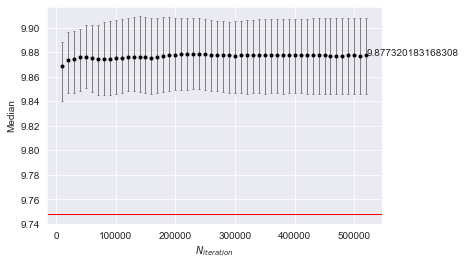

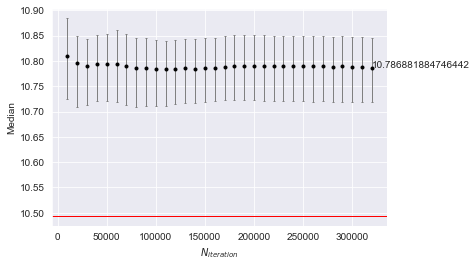

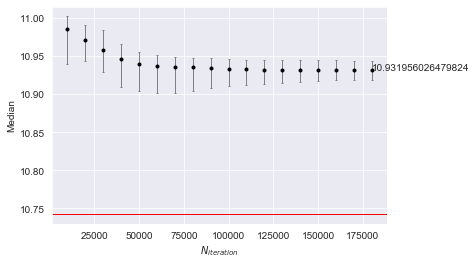

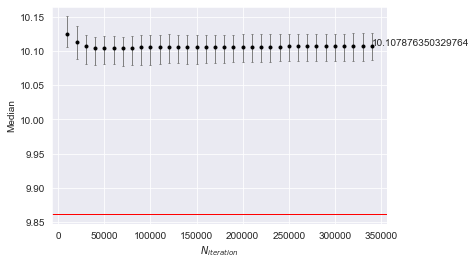

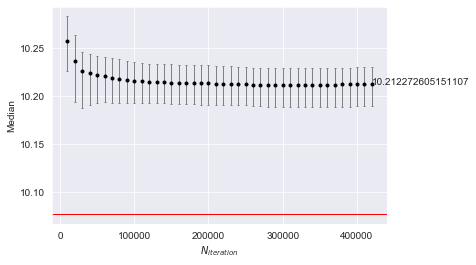

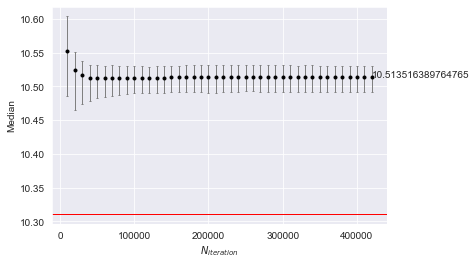

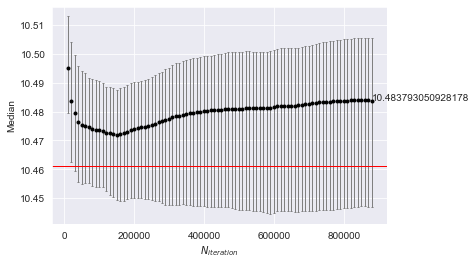

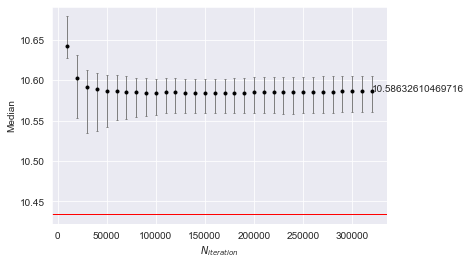

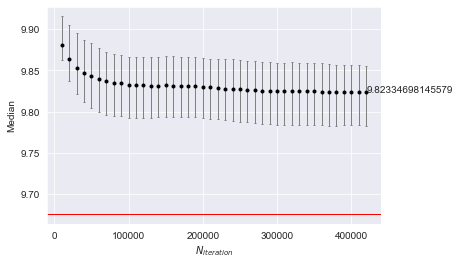

In [350]:
meds = []
ups = []
los = []
for i,s in enumerate(valid_set):
    fig, ax = plt.subplots(1,1)
    s.avg_perc_plot(ax,i,'specphoto',10000)
    meds.append(s.get_output())
    up, lo = s.get_err()
    ups.append(up)
    los.append(lo)

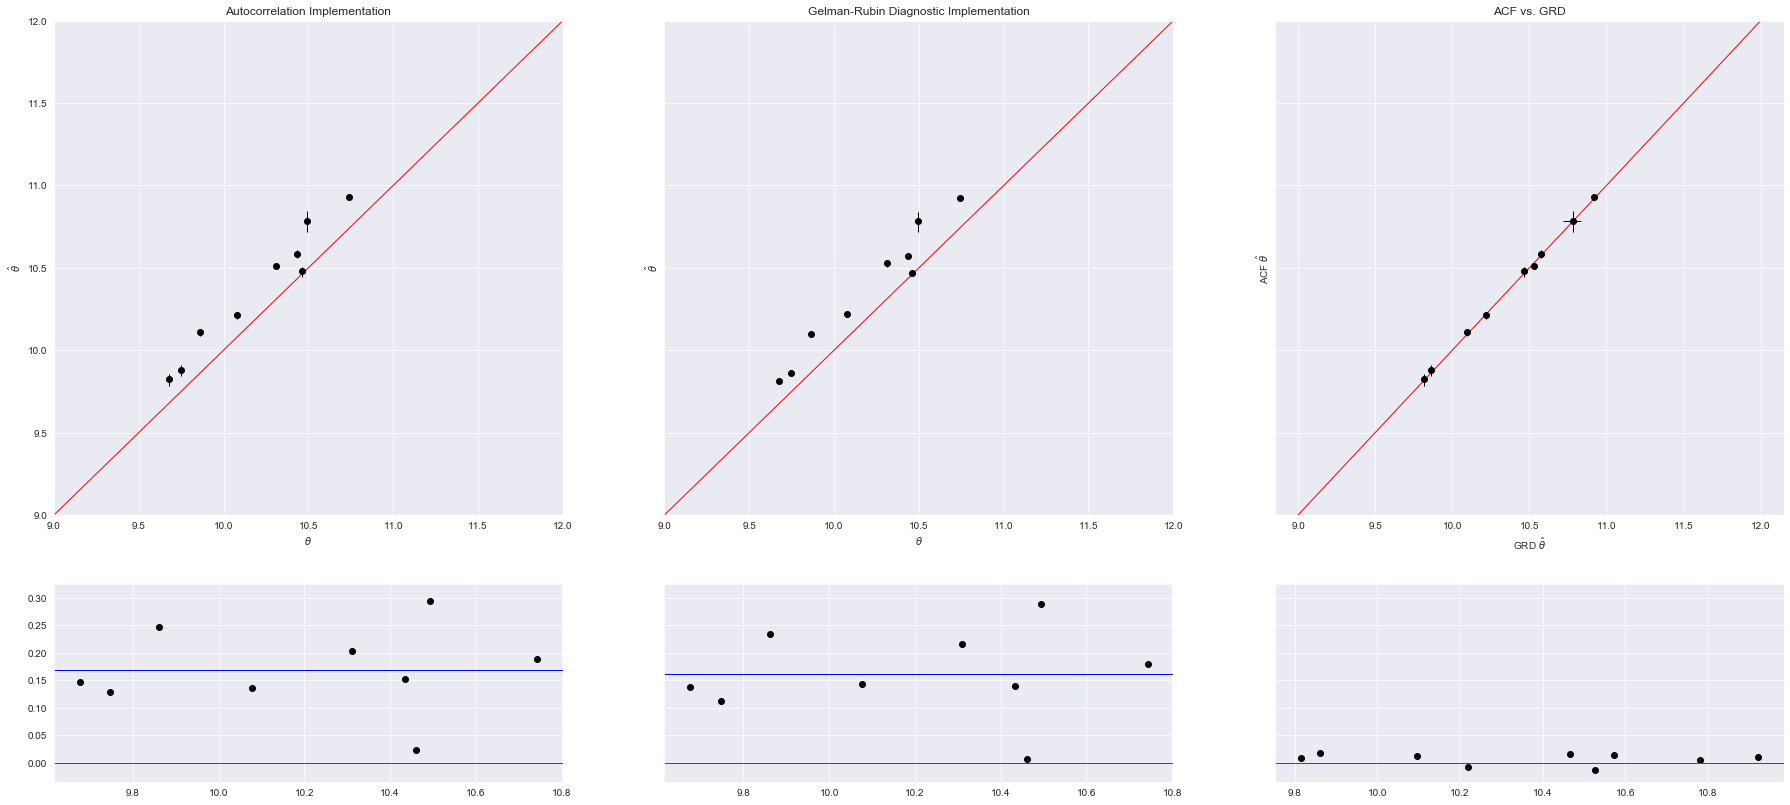

In [352]:
fig, axs = plt.subplots(2,3,figsize=(31,14), gridspec_kw={'height_ratios' : (10,4)}, sharey = 'row')
xlim = axs[0,0].set_xlim(9,12)
axs[0,0].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)

for ax in axs:
    for x in ax:
        x.grid()

axs[0,0].errorbar(input_mass[:len(meds)],meds,yerr=(ups,los), elinewidth = 1, fmt = 'ok',c = 'k')
axs[0,1].errorbar(input_mass[:len(meds)],compare[:len(meds)],yerr=(compare_up[:len(meds)], compare_lo[:len(meds)]), fmt = 'ok',elinewidth = 1, c = 'k')
axs[0,2].errorbar(compare[:len(meds)],meds,xerr = (compare_up[:len(meds)],compare_lo[:len(meds)]), yerr = (ups,los), fmt = 'ok', elinewidth = 1, c = 'k')

axs[1,0].scatter(input_mass[:len(meds)],np.array(meds)-np.array(input_mass[:len(meds)]), c = 'k')
axs[1,1].scatter(input_mass[:len(meds)],np.array(compare[:len(meds)])-np.array(input_mass[:len(meds)]), c = 'k')
axs[1,2].scatter(compare[:len(meds)],np.array(meds)-np.array(compare[:len(meds)]), c = 'k')

axs[0,0].set_title('Autocorrelation Implementation')
axs[0,1].set_title('Gelman-Rubin Diagnostic Implementation')
axs[0,2].set_title('ACF vs. GRD')

axs[0,0].set_xlabel('$\\theta$')
axs[0,0].set_ylabel('$\hat{\\theta}$')

axs[0,1].set_xlabel('$\\theta$')
axs[0,1].set_ylabel('$\hat{\\theta}$')

axs[0,2].set_xlabel('GRD $\hat{\\theta}$')
axs[0,2].set_ylabel('ACF $\hat{\\theta}$')

axs[1,0].axhline(0,c = 'r', lw = 1)
axs[1,1].axhline(0,c = 'r', lw = 1)
axs[1,2].axhline(0,c = 'r', lw = 1)

axs[1,0].axhline(np.mean(np.array(meds)-np.array(input_mass[:len(meds)])), c = 'b', lw = 1)
axs[1,1].axhline(np.mean(np.array(compare[:len(meds)])-np.array(input_mass[:len(meds)])), c = 'b', lw = 1)

axs[0,0].plot([9,12],[9,12], c = 'r', lw = 1)
axs[0,1].plot([9,12],[9,12], c = 'r', lw = 1)
axs[0,2].plot([9,12],[9,12], c = 'r', lw = 1)

plt.show()